markdown

In [125]:
import pandas as pd
import numpy as np

In [126]:
df = pd.read_csv('emails.csv', index_col=0)
df.head

<bound method NDFrame.head of             the  to  ect  and  for  of    a  you  hou  in  ...  connevey  jay  \
Email No.                                                  ...                  
Email 1       0   0    1    0    0   0    2    0    0   0  ...         0    0   
Email 2       8  13   24    6    6   2  102    1   27  18  ...         0    0   
Email 3       0   0    1    0    0   0    8    0    0   4  ...         0    0   
Email 4       0   5   22    0    5   1   51    2   10   1  ...         0    0   
Email 5       7   6   17    1    5   2   57    0    9   3  ...         0    0   
...         ...  ..  ...  ...  ...  ..  ...  ...  ...  ..  ...       ...  ...   
Email 5168    2   2    2    3    0   0   32    0    0   5  ...         0    0   
Email 5169   35  27   11    2    6   5  151    4    3  23  ...         0    0   
Email 5170    0   0    1    1    0   0   11    0    0   1  ...         0    0   
Email 5171    2   7    1    0    2   1   28    2    0   8  ...         0    0  

In [127]:
df_filtered = df[df['Prediction'] != 0]
df_filtered.head

<bound method NDFrame.head of             the  to  ect  and  for  of    a  you  hou  in  ...  connevey  jay  \
Email No.                                                  ...                  
Email 6       4   5    1    4    2   3   45    1    0  16  ...         0    0   
Email 8       0   2    2    3    1   2   21    6    0   2  ...         0    0   
Email 17      3   1    2    2    0   1   17    0    0   1  ...         0    0   
Email 18     36  21    6   14    7  17  194   25    5  59  ...         0    0   
Email 26     12  53    2   14   18  14  287    0    2  86  ...         0    0   
...         ...  ..  ...  ...  ...  ..  ...  ...  ...  ..  ...       ...  ...   
Email 5163    2   3    1    2    1   2   32    0    0   7  ...         0    0   
Email 5164    0   0    1    0    0   0    1    0    0   0  ...         0    0   
Email 5167    1   0    1    1    0   0    4    0    0   0  ...         0    0   
Email 5170    0   0    1    1    0   0   11    0    0   1  ...         0    0  

Syy seuraavien sanojen poistoon on että ne on täytesanoja (filler words)

In [128]:
words = words = [
    "um", "uh", "like", "actually", "basically", "well", "so", "right", "okay", "anyways", "look", "listen", "frankly", 
    "literally", "just", "perhaps", "thing", "stuff", "definitely", "certainly", "surely", "absolutely", "totally", 
    "completely", "utterly", "essentially", "fundamentally", "practically", "virtually", "nearly", "almost", "about", 
    "around", "approximately", "roughly", "someway", "somehow", "sometime", "sometimes", "occasionally", "often", 
    "frequently", "regularly", "usually", "typically", "generally", "mainly", "mostly", "largely", "particularly", 
    "especially", "specifically", "expressly", "explicitly", "precisely", "exactly", "merely", "simply", "only", 
    "solely", "probably", "maybe", "possibly", "seemingly", "apparently", "ostensibly", "evidently", "presumably", 
    "assumably", "likely", "quite", "rather", "somewhat", "partly"
    ]

# Poistetaan sarakkeet, joiden nimet ovat yksittäisiä kirjaimia tai sisältävät poistettavia sanoja
df_filtered = df_filtered.loc[:, 
    #(df_filtered.columns.str.len() >= 7 ) &  # <-- SARAKKEEN NIMEN PITUUS ON YLI X
    (~df_filtered.columns.isin(words))
]
df_filtered

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
Email No.,,,,,,,,,,,,,,,,,,,,,
Email 6,4,5,1,4,2,3,45,1,0,16,...,0,0,0,0,0,0,0,0,0,1
Email 8,0,2,2,3,1,2,21,6,0,2,...,0,0,0,0,0,0,0,1,0,1
Email 17,3,1,2,2,0,1,17,0,0,1,...,0,0,0,0,0,0,0,1,0,1
Email 18,36,21,6,14,7,17,194,25,5,59,...,0,0,0,0,0,0,0,3,0,1
Email 26,12,53,2,14,18,14,287,0,2,86,...,0,0,0,0,0,0,0,6,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Email 5163,2,3,1,2,1,2,32,0,0,7,...,0,0,0,0,0,0,0,0,0,1
Email 5164,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Email 5167,1,0,1,1,0,0,4,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [129]:
lyhyet = df_filtered.loc[:, (df_filtered.columns.str.len() >= 2) & (df_filtered.columns.str.len() <= 3) ]
lyhyet_sanat = lyhyet.shape[1]
lyhyet_sanat
#print(f"Number of columns: {num_columns}")

399

In [130]:
keski = df_filtered.loc[:, (df_filtered.columns.str.len() >= 4) & (df_filtered.columns.str.len() <= 6) ]
keski_sanat = keski.shape[1]
keski_sanat

1359

In [131]:
keskisuuret = df_filtered.loc[:, (df_filtered.columns.str.len() >=7) & (df_filtered.columns.str.len() <= 9) ]
keskisuuret_sanat = keskisuuret.shape[1]
keskisuuret_sanat

924

In [132]:
suurimmat = lyhyet = df_filtered.loc[:, (df_filtered.columns.str.len() >=10) ]
suurimmat_sanat = suurimmat.shape[1]
suurimmat_sanat

264

In [133]:
# import pandas as pd

# # Lue data
# df = pd.read_csv('emails.csv', index_col=0)

# # Poistetaan rivit, joissa 'Prediction' sarakkeen arvo on 0
# df_filtered = df[df['Prediction'] != 0]

# # Lista poistettavista sanoista
# words = words = [
#     "um", "uh", "like", "actually", "basically", "well", "so", "right", "okay", "anyways", "look", "listen", "frankly", 
#     "literally", "just", "perhaps", "thing", "stuff", "definitely", "certainly", "surely", "absolutely", "totally", 
#     "completely", "utterly", "essentially", "fundamentally", "practically", "virtually", "nearly", "almost", "about", 
#     "around", "approximately", "roughly", "someway", "somehow", "sometime", "sometimes", "occasionally", "often", 
#     "frequently", "regularly", "usually", "typically", "generally", "mainly", "mostly", "largely", "particularly", 
#     "especially", "specifically", "expressly", "explicitly", "precisely", "exactly", "merely", "simply", "only", 
#     "solely", "probably", "maybe", "possibly", "seemingly", "apparently", "ostensibly", "evidently", "presumably", 
#     "assumably", "likely", "quite", "rather", "somewhat", "partly"
#     ]

# # remove_words = [
# #     "the", "to", "ect", "and", "for", "of", "a", "you", "hou", "in", "on", "is", 
# #     "this", "enron", "i", "be", "that", "will", "have", "with", "your", "at", 
# #     "we", "s", "are", "it", "by", "com", "as", "from", "gas", "or", "not", 
# #     "me", "deal", "if", "meter", "hpl", "please", "re", "e", "any", "our", 
# #     "corp", "can", "d", "all", "has", "was", "know", "need", "an", "forwarded", 
# #     "new", "t", "may", "up", "j", "mmbtu", "should", "do", "am", "get", "out", 
# #     "see", "no", "there", "price", "daren", "but", "been", "company"
# # ]

# # Poistetaan sarakkeet, joiden nimet ovat yksittäisiä kirjaimia tai sisältävät poistettavia sanoja
# df_filtered = df_filtered.loc[:, 
#     (df_filtered.columns.str.len() >= 7 )& (df_filtered.columns.str.len() <= 9) &  # <-- SARAKKEEN NIMEN PITUUS ON YLI X
#     (~df_filtered.columns.isin(words))
# ]

# #  & (df_filtered.columns.str.len() <= 9)  <--- lisää tämä str.len() jos haluat tietyn pituisia esim. 4-6

# # Asetetaan keskiarvon raja-arvo
# threshold = 5

# # Laske sarakkeiden keskiarvot
# column_means = df_filtered.mean()

# # Poistetaan sarakkeet, joiden keskiarvo on alle raja-arvon
# df_filtered = df_filtered.loc[:, column_means <= threshold]

# # Tulostetaan lopullinen taulu ja sarakkeiden keskiarvot
# print("Lopullinen taulu:")
# print(df_filtered)

# # print("\nSarakkeiden keskiarvot:")
# # print(column_means[column_means >= threshold])


In [134]:
# sanojen määrä. lyhyet 2-3, keski 4-6, keskisuuret 7-9, suurimmat >= 10. tulos = sarakkeiden määrä
lyhyet_sanat
keski_sanat
keskisuuret_sanat
suurimmat_sanat

yhteensa = lyhyet_sanat + keski_sanat + keskisuuret_sanat + suurimmat_sanat
print("yhteensä: ", yhteensa)

a = lyhyet_sanat/yhteensa * 100
print(a)
b = keski_sanat/yhteensa * 100
c = keskisuuret_sanat/yhteensa * 100
d = suurimmat_sanat/yhteensa *100
print(b)
print(c)
print(d)

yhteensä:  2946
13.54378818737271
46.13034623217923
31.364562118126273
8.961303462321792


Text(0.5, 1.0, 'Ympyrädiagrammi')

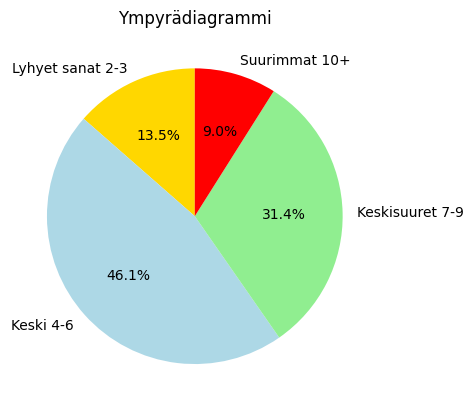

In [135]:

import matplotlib.pyplot as plt

labels = ['Lyhyet sanat 2-3', 'Keski 4-6', 'Keskisuuret 7-9', 'Suurimmat 10+']
# sizes = [10.812519759721784, 42.90230793550427
# , 37.812203604173256, 8.472968700600696]
sizes = [a, b, c, d]

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['gold', 'lightblue', 'lightgreen', 'red'])
plt.title("Ympyrädiagrammi")